# AALSalesAnalysis

In [100]:
import pandas as pd

df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df.head()

,Date,Time,State,Group,Unit,Sales
0,01-Oct-20,Morning,WA,Kids,8,20000
1,01-Oct-20,Morning,WA,Men,8,20000
2,01-Oct-20,Morning,WA,Women,4,10000
3,01-Oct-20,Morning,WA,Seniors,15,37500
4,01-Oct-20,Afternoon,WA,Kids,3,7500


# Checking for Null Values

In [101]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [102]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


# Normalizing data using MinMaxScaler

In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Unit', 'Sales']] = scaler.fit_transform(df[['Unit', 'Sales']])

df[['Unit', 'Sales']].head()

,Unit,Sales
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873


# Data analysis with grouping

In [104]:
df.groupby(['Time'])['Sales'].sum()

Time
 Afternoon    643.857143
 Evening      631.666667
 Morning      645.126984
Name: Sales, dtype: float64

##### Sale is slighilty higher in morning copmared with other timings

In [105]:
df.groupby(['Group'])['Sales'].agg(['mean', 'sum']).sort_values(by = 'sum', ascending=False)

,mean,sum
Group,,
Men,0.256320,484.444444
Women,0.255287,482.492063
Kids,0.254044,480.142857
Seniors,0.250567,473.571429


##### Sales by Men is comparitively higher than other age group

In [106]:
df.groupby(['State'])['Sales'].agg(['mean', 'sum']).sort_values(by = 'sum', ascending=False)

,mean,sum
State,,
VIC,0.588859,635.968254
NSW,0.408995,441.714286
SA,0.314271,339.412698
QLD,0.164712,177.888889
TAS,0.102058,110.222222
NT,0.100999,109.079365
WA,0.098486,106.365079


##### State VIC has greater sales compared with other states and WA has the least sales

# Weekly and monthly sales analysis

In [109]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d-%m-%y')

df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238
1,2020-10-01,Morning,WA,Men,0.095238,0.095238
2,2020-10-01,Morning,WA,Women,0.031746,0.031746
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873


In [110]:
df['Week'] = df['Date'].dt.isocalendar().week

In [116]:
df['day_of_week'] = df['Date'].dt.day_name()

In [117]:
df['Month'] = df['Date'].dt.month

In [147]:
df['Quarter'] = df['Date'].dt.quarter

In [115]:
df.groupby('Week')['Sales'].agg(['mean', 'sum']).sort_values(by = 'sum', ascending = False)

,mean,sum
Week,,
52,0.311305,183.047619
51,0.310064,182.317460
50,0.308660,181.492063
49,0.288117,169.412698
41,0.259826,152.777778
43,0.257802,151.587302
42,0.255912,150.476190
44,0.242977,122.460317
48,0.200167,117.698413


##### Sale in 52nd week is compaetively higher

In [118]:
df.groupby('Month')['Sales'].agg(['mean', 'sum']).sort_values(by = 'sum', ascending = False)

,mean,sum
Month,,
12,0.309221,779.238095
10,0.256211,645.650794
11,0.196731,495.761905


##### December month sales is higher than rest of the months

In [120]:
df.groupby('day_of_week')['Sales'].agg(['mean', 'sum']).sort_values(by = 'sum', ascending = False)

,mean,sum
day_of_week,,
Tuesday,0.260873,284.873016
Wednesday,0.258649,282.444444
Thursday,0.255509,279.015873
Sunday,0.249259,272.190476
Monday,0.247631,270.412698
Friday,0.247340,270.095238
Saturday,0.259543,261.619048


##### Sale on Tuesday is slightly higher than other days of the week

# Visualization

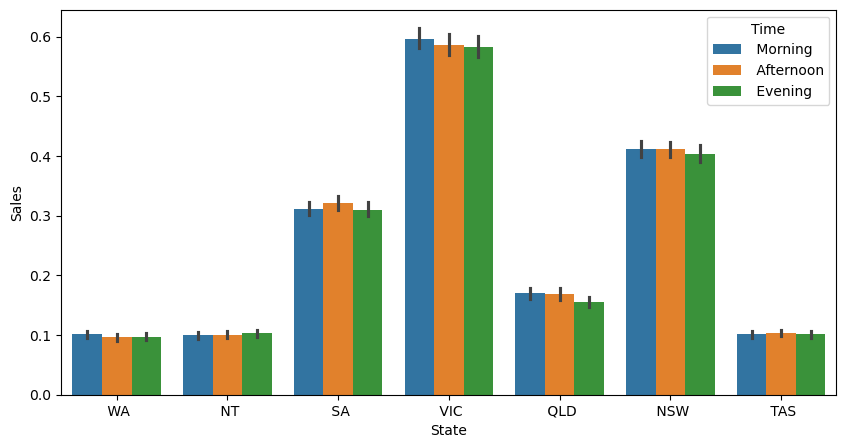

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.barplot(data = df, x = 'State', y = 'Sales', hue = 'Time')
plt.show()

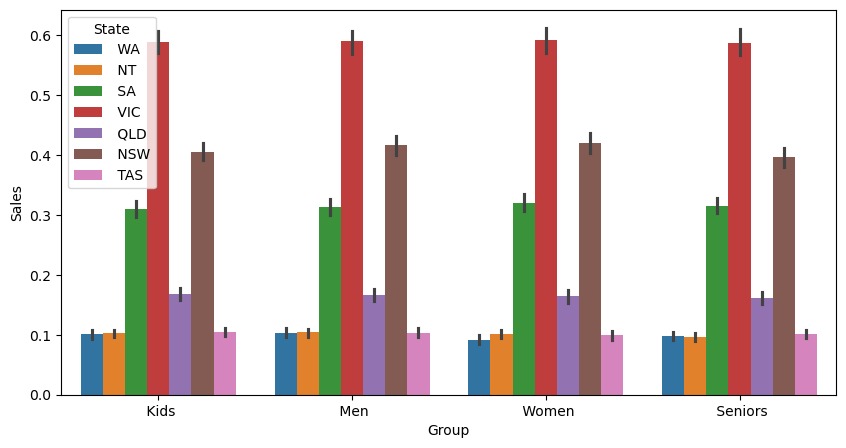

In [133]:
plt.figure(figsize=(10, 5))

sns.barplot(data = df, x = 'Group', y = 'Sales', hue = 'State')
plt.
plt.show()

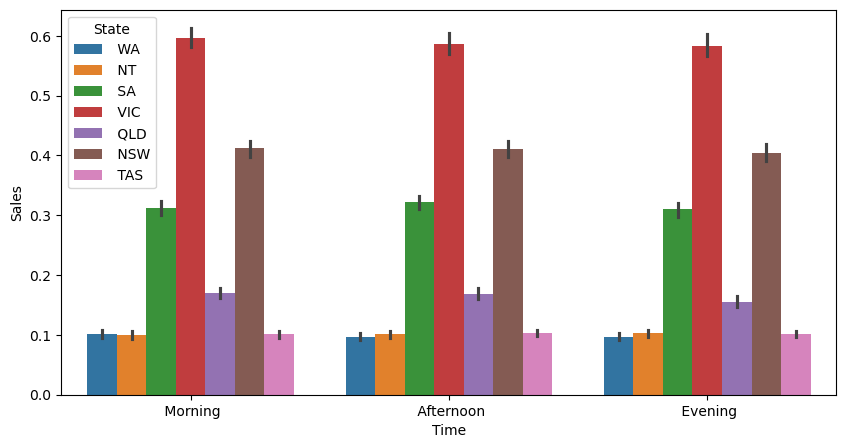

In [137]:
plt.figure(figsize=(10, 5))

sns.barplot(data = df, x = 'Time', y = 'Sales', hue = 'State')
plt.show()

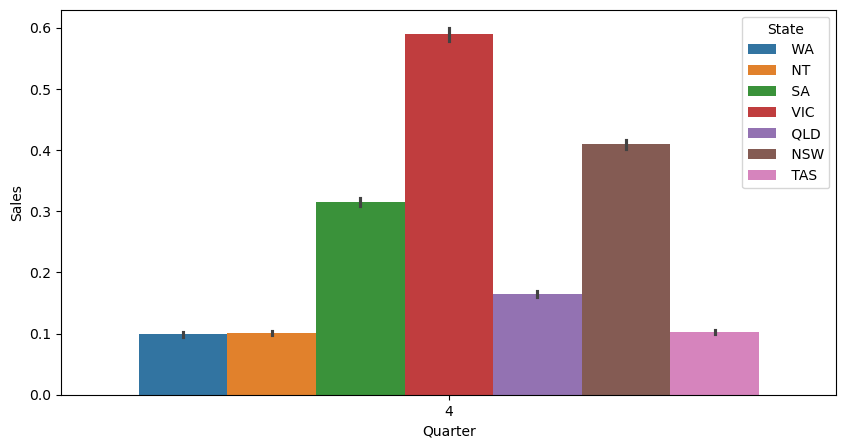

In [148]:
plt.figure(figsize=(10, 5))

sns.barplot(data = df, x = 'Quarter', y = 'Sales', hue = 'State')
plt.show()

# Insights

#### VIC and NSW states generates the highest revenew compared with other states, and states WA, NT, TAS requires more sales program as the revenue is comparitively very less 